In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

## Sigmoid 함수
### Sigmoid 함수의 특징
1. 항상 값이 증가하는 단조증가함수
2. 0과 1사이의 값을 취함 -> 확률로 해석하기에 매우 적절
3. x = 0일 때 값 0.5
4. 그래프는 점 (0, 0.5)를 기준으로 점대칭

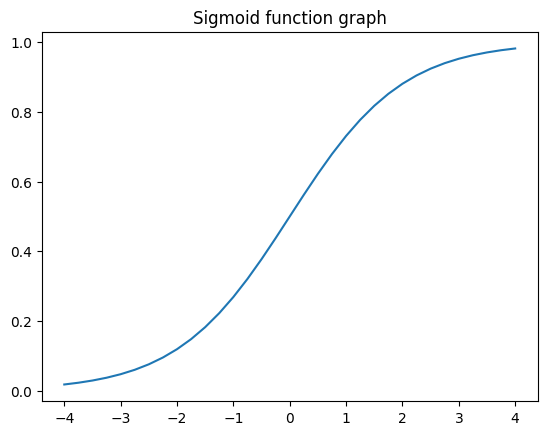

In [2]:
# 넘파이 배열로 x_np를 정의
x_np = np.arange(-4, 4.1, 0.25)

# x_np를 텐서로 변환
x = torch.tensor(x_np).float()

# y값 계산
y = torch.sigmoid(x)

# 그래프 출력
plt.title('Sigmoid function graph')
plt.plot(x.data, y.data)
plt.show()

## 교차 엔트로피 함수

In [3]:
# 학습용 데이터 준비
from sklearn.datasets import load_iris

# 데이터 불러오기
iris = load_iris()

# 입력 데이터와 정답 데이터
x_org, y_org = iris.data, iris.target

# 결과 확인
print('원본 데이터 :', x_org.shape, y_org.shape)

원본 데이터 : (150, 4) (150,)


In [4]:
# 데이터 추출
# 클래스는 0 또는 1
# 항목은 sepal_length와 sepal_width

x_data = iris.data[:100, :2]
y_data = iris.target[:100]

# 결과 확인
print('대상 데이터 :', x_data.shape, y_data.shape)

대상 데이터 : (100, 2) (100,)


In [5]:
# 훈련 데이터와 검증 데이터로 분할 (동시에 셔플)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = 70, test_size = 30, random_state = 123)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 2) (30, 2) (70,) (30,)


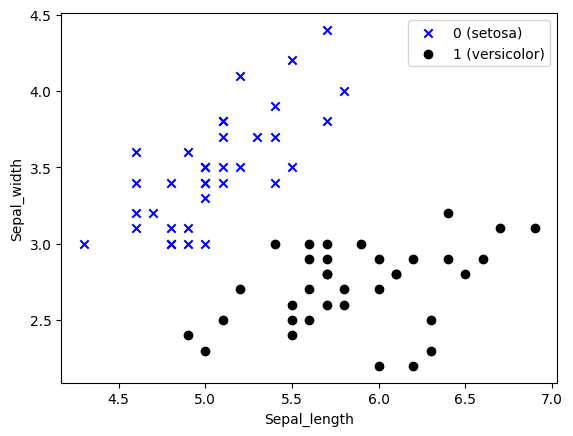

In [6]:
# 산포도 출력
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:, 0], x_t0[:, 1], marker = 'x', c = 'b', label = '0 (setosa)')
plt.scatter(x_t1[:, 0], x_t1[:, 1], marker = 'o', c = 'k', label = '1 (versicolor)')
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.legend()
plt.show()

In [7]:
# 입력 차원수
n_input = x_train.shape[1]

# 출력 차원수
n_output = 1

# 결과 확인
print(f'n_input : {n_input} / n_output : {n_output}')

n_input : 2 / n_output : 1


In [8]:
# 모델 정의
# 2 입력 1 출력 로지스틱 회귀 모델
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = nn.Linear(n_input, n_output)
        self.sigmoid = nn.Sigmoid()

        # 초깃값을 전부 1로 함
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)
    # 예측 함수 정의
    def forward(self, x):
        # 선형 함수에 입력값을 넣고 계산한 결과
        x1 = self.l1(x)
        # 계산 결과에 시그모이드 함수 적용
        x2 = self.sigmoid(x1)

        return x2

In [9]:
net = Net(n_input = 2, n_output = 1)

In [10]:
# 모델 개요 표시 1
print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [11]:
# # 모델 개요 표시 2
# summary(net, (2, ))

In [12]:
# 최적화 알고리즘과 손실 함수의 정의

# 손실 함수 : 교차 엔트로피 함수
criterion = nn.BCELoss()

# 학습률
lr = 0.01

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr = lr)

In [13]:
# 입력 데이터 x_train과 정답 데이터 y_train의 텐서화
inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

# 정답 데이터는 N행 1열 행렬로 변환
labels1 = labels.view((-1, 1))

# 검증 데이터의 텐서화
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

# 검증 데이터도 N행 1열 행렬로 변환
labels1_test = labels_test.view((-1, 1))

In [14]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels1)

In [15]:
# 초기화 처리

# 학습률
lr = 0.01

# 초기화
net = Net(n_input, n_output)

# 손실 함수 : 교차 엔트로피 함수
criterion = nn.BCELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr = lr)

# 반복 횟수
num_epochs = 10000

# 기록용 리스트 초기화
history = np.zeros((0, 5))

In [24]:
# 메인 루프
for epoch in range(num_epochs):
    # 훈련 페이즈

    # 경사값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels1)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 손실 저장 (스칼라값 취득)
    train_loss = loss.item()

    # 예측 라벨 계산 (0 또는 1)
    predicted = torch.where(outputs < 0.5, 0, 1)

    # 정확도 계산
    train_acc = (predicted == labels1).sum() / len(y_train)

    if epoch % 10 == 0:
        print(f'Epoch : [{epoch} / {num_epochs}], loss : {train_loss : .5f}, acc : {train_acc : .5f}, val_loss : {val_loss : .5f}, val_acc : {val_acc : .5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch : [0 / 10000], loss :  0.07950, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [10 / 10000], loss :  0.07944, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [20 / 10000], loss :  0.07939, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [30 / 10000], loss :  0.07934, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [40 / 10000], loss :  0.07928, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [50 / 10000], loss :  0.07923, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [60 / 10000], loss :  0.07918, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [70 / 10000], loss :  0.07912, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [80 / 10000], loss :  0.07907, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [90 / 10000], loss :  0.07902, acc :  1.00000, val_loss :  0.15391, val_acc :  0.96667
Epoch : [100 / 10000], loss :  0.07897, acc :  1.00

In [25]:
 # 예측 페이즈
if epoch % 10 == 0:
    # 예측 계산
    outputs_test = net(inputs_test)

    # 손실 계산
    loss_test = criterion(outputs_test, labels1_test)

    # 손실 저장 (스칼라값 취득)
    val_loss = loss_test.item()

    # 예측 라벨 계산 (0 또는 1)
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 정확도 계산
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)

    print(f'Epoch : [{epoch} / {num_epochs}], loss : {train_loss : .5f}, acc : {train_acc : .5f}, val_loss : {val_loss : .5f}, val_acc : {val_acc : .5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

In [26]:
# 손실과 정확도 확인
print(f' 초기상태 : 손실 : {history[0, 3] : .5f} 정확도 : {history[0, 4] : .5f}')
print(f' 최종상태 : 손실 : {history[-1, 3] : .5f} 정확도 : {history[-1, 4] : .5f}')

 초기상태 : 손실 :  0.15391 정확도 :  0.96667
 최종상태 : 손실 :  0.15391 정확도 :  0.96667
